In [ ]:
import os
os.chdir('/content')
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mohamed99ayman","key":"ae3067e356d2194f37db76ae8c3d45d4"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-09 12:09:58           7313        645  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4423        367  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1500        130  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

downloading faces dataset

In [ ]:
import os
os.chdir('/content')
! kaggle datasets download kasikrit/att-database-of-faces

att-database-of-faces.zip: Skipping, found more recently modified local copy (use --force to force download)


unziping faces dataset

In [ ]:
 os.chdir('/content')
 ! mkdir ORL
 ! unzip att-database-of-faces.zip -d ORL


Archive:  att-database-of-faces.zip
  inflating: ORL/README              
  inflating: ORL/s1/1.pgm            
  inflating: ORL/s1/10.pgm           
  inflating: ORL/s1/2.pgm            
  inflating: ORL/s1/3.pgm            
  inflating: ORL/s1/4.pgm            
  inflating: ORL/s1/5.pgm            
  inflating: ORL/s1/6.pgm            
  inflating: ORL/s1/7.pgm            
  inflating: ORL/s1/8.pgm            
  inflating: ORL/s1/9.pgm            
  inflating: ORL/s10/1.pgm           
  inflating: ORL/s10/10.pgm          
  inflating: ORL/s10/2.pgm           
  inflating: ORL/s10/3.pgm           
  inflating: ORL/s10/4.pgm           
  inflating: ORL/s10/5.pgm           
  inflating: ORL/s10/6.pgm           
  inflating: ORL/s10/7.pgm           
  inflating: ORL/s10/8.pgm           
  inflating: ORL/s10/9.pgm           
  inflating: ORL/s11/1.pgm           
  inflating: ORL/s11/10.pgm          
  inflating: ORL/s11/2.pgm           
  inflating: ORL/s11/3.pgm           
  inflating: O

loading faces dataset

In [ ]:
import os
from skimage.io import imread
import numpy as np
os.chdir('/content/ORL')
directory = os.getcwd()
files=os.listdir(directory)
files.remove('README')
# files.remove('.ipynb_checkpoints')
# files.remove('kaggle.json')
files = sorted(files, key=lambda x: int(x[1:]))
Dataset=[]
y=[]
 
Y=0
 
for filename in files:
    Y+=1
    each_file=os.listdir(filename)
    each_file.sort()
    each_file = sorted(each_file, key=lambda x: int(x[:-4]))
    for image in each_file:
      img = imread(os.getcwd()+'/'+filename+'/'+image)
      Dataset.append(img.flatten())
      y.append(Y)
 
y=np.array(y)
Dataset=np.array(Dataset)
print(np.shape(y))

(400,)


downloading non-faces dataset

In [ ]:
 os.chdir('/content')
!kaggle datasets download -d prasunroy/natural-images

 94% 322M/342M [00:03<00:00, 110MB/s]
100% 342M/342M [00:03<00:00, 108MB/s]


unziping non-faces dataset

In [ ]:
os.chdir('/content')
! mkdir non_faces
! unzip natural-images.zip -d /content/non_faces

Streaming output truncated to the last 5000 lines.
  inflating: /content/non_faces/natural_images/cat/cat_0204.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0205.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0206.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0207.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0208.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0209.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0210.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0211.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0212.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0213.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0214.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0215.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0216.jpg  
  inflating: /content/non_faces/natural_images/cat/cat_0217.jpg  
  inflating: /content/non

In [ ]:
 pip install pillow

loading non-faces dataset

In [ ]:
import os
from skimage.io import imread
import numpy as np
from PIL import Image
import PIL
import glob
os.chdir('/content/non_faces/natural_images')
directory = os.getcwd()
files=os.listdir(directory)
files.remove('person')
files.sort()
no_face_dataset=[]
no_face_y=[]

class_id = -1
pictures_per_class = 600

for class_name in files:
    class_id += 1
    each_file=os.listdir(class_name)
    each_file.sort()
    count = pictures_per_class
    for i in range(count):
      path = os.getcwd() + '/' + class_name + '/' + each_file[i]
      img = Image.open(path)
      resized_img = img.resize((92,112))
      img = resized_img.convert('L')
      ready_image = np.array(img)
      no_face_dataset.append(ready_image.flatten())
      no_face_y.append(class_id)

no_face_y = np.array(no_face_y)
no_face_dataset = np.array(no_face_dataset)
print(np.shape(no_face_dataset))

(4200, 10304)


Splitting the datasets

In [ ]:
faces_and_nofaces = np.concatenate((Dataset, no_face_dataset[0:400]))
print(np.shape(faces_and_nofaces))
labels_y = np.concatenate((np.ones(400),np.zeros(400)), axis = 0)
train_x = faces_and_nofaces[0::2]
train_y = labels_y[0::2]
test_x = faces_and_nofaces[1::2]
test_y =labels_y[1::2]
print(np.shape(labels_y))
print(np.shape(test_y_))

(800, 10304)
(800,)
(400,)


Training using naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

gnb = GaussianNB()
gnb.fit(train_x, train_y)
y_pred = gnb.predict(test_x)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

success=[]
failure=[]
for i in range(len(y_pred)):
  if y_pred[i] != test_y[i]:
    failure.append(i)
  else:
    success.append(i)
print(f'failure: {len(failure)}\n', failure)
print(f'success: {len(success)}\n', success)



Accuracy: 0.9825
failure: 7
 [0, 1, 26, 27, 28, 29, 166]
success: 393
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 

Showing some test cases

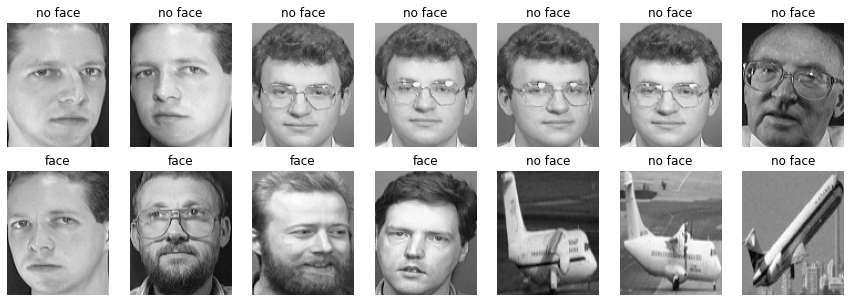

In [ ]:
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

fig = plt.figure(figsize =(15,5))
rows = 2
cols = 7
img_no = 1 

for i in range(0,7):
  fig.add_subplot(rows,cols,img_no)
  img_no += 1
  x = np.array(test_X_[failure[i]])
  x = np.reshape(x,(112,92))
  img = Image.fromarray(x)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title('face' if (y_pred[failure[i]] == 1) else 'no face')


for i in range(0,400,60):
  fig.add_subplot(rows,cols,img_no)
  img_no += 1
  x = np.array(test_X_[success[i]])
  x = np.reshape(x,(112,92))
  img = Image.fromarray(x)
  plt.imshow(img, cmap = 'gray')
  plt.axis('off')
  plt.title('face' if (y_pred[success[i]] == 1) else 'no face')
